In [1]:
import os
import cv2 #OpenCV
import numpy as np #Biblioteca Numerica
import matplotlib.pyplot as plt #Visualizaciones

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

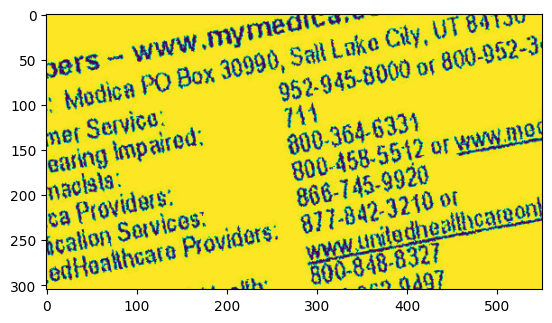

In [12]:
# Carga una imagenes en blanco y negro.. 
image = cv2.imread("text1.jpg",0)
plt.imshow(image)

In [3]:
def mostrar_lineas(image):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    # para obtener directamente los puntos finales de línea
    lines_list =[]
    lines = cv2.HoughLinesP(
                edges, # 
                1, # es la resolución de la distancia en píxeles.
                np.pi/180, # es la resolución del ángulo en radianes.
                threshold=100, # es el número mínimo de votos requeridos para considerar una línea.
                minLineLength=5, # es la longitud mínima permitida de una línea.
                maxLineGap=10 # es la máxima separación permitida entre segmentos de línea para unirlos.
                )
     
    # Iterar sobre las líneas detectadas
    for points in lines:
        # Extracted points nested in the list
        x1,y1,x2,y2=points[0]
        # Draw the lines joing the points
        # On the original image
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)
        # Maintain a simples lookup list for points
        lines_list.append([(x1,y1),(x2,y2)])
    
    # Save the result image
    cv2.imwrite('img_lines.png',image)

    print(lines)
    plt.imshow(image)
    

In [7]:
# Creando la funcion lab 5 
def rotar_imagen_correcta(image):
    # Detectar bordes usando Canny
    # El método cv2.Canny detecta los bordes en la imagen con umbrales de 50 y 150, y apertureSize es el tamaño del kernel Sobel usado internamente.
    # Se utiliza para detectar puntos en la imagen donde hay cambios bruscos de intensidad, lo que indica la presencia de un borde.
    edges = cv2.Canny(image, 50, 150, apertureSize=3) # apertureSize (3) es la dimension del kernel 
    
    # Detectar líneas usando HoughLinesP
    lines = cv2.HoughLinesP( # HoughLinesP detecta líneas rectas formadas por la alineación de estos puntos.
            edges, # 
            1, # es la resolución de la distancia en píxeles.
            np.pi/180, # es la resolución del ángulo en radianes.
            threshold=100, # es el número mínimo de votos requeridos para considerar una línea.
            minLineLength=5, # es la longitud mínima permitida de una línea.
            maxLineGap=10 # es la máxima separación permitida entre segmentos de línea para unirlos.
    )

    # Lista para almacenar los ángulos de las líneas
    angles = []

    # Iterar sobre las líneas detectadas
    for points in lines:
        x1, y1, x2, y2 = points[0]
        # Calcular el ángulo de la línea
        angle = np.arctan2(y2 - y1, x2 - x1) * 180 / np.pi
        angles.append(angle)

    
    # Calcular el ángulo de rotación promedio
    if angles:
        median_angle = np.median(angles)
    else:
        median_angle = 0

    print(median_angle)
    
    # Rotar la imagen para corregir la inclinación
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, median_angle, 1.0)

    
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # Mostrar la imagen rotada
    plt.imshow(rotated, cmap='gray')
    plt.title('Imagen Rotada')
    plt.axis('off')
    plt.show()

    # Guardar la imagen rotada
    cv2.imwrite('img_correct.jpg', rotated)



[[[123  84 321  46]]

 [[  0 285 245 242]]

 [[ 23 105  97  91]]

 [[149  78 257  57]]

 [[ 21  90  39  87]]

 [[  0 298 135 257]]

 [[290 275 536 228]]

 [[393  25 413  21]]

 [[  0 138  34 132]]

 [[332  37 379  29]]

 [[269  88 545  39]]

 [[275 180 414 155]]

 [[ 21  94 184  62]]

 [[ 23 128 128 111]]

 [[107  82 182  68]]

 [[262  95 294  89]]

 [[282 213 360 188]]

 [[457 148 549 130]]

 [[ 16 266 168 228]]

 [[309 274 418 253]]

 [[469  19 530   8]]

 [[375 157 547 127]]

 [[147  80 412  29]]

 [[ 25 293 156 265]]

 [[197  61 256  50]]

 [[  4 282 110 263]]

 [[510 145 544 138]]

 [[  3 225 126 204]]

 [[168 262 249 246]]

 [[332  39 380  30]]

 [[332  41 413  27]]

 [[277  57 367  40]]

 [[  1 265 167 227]]

 [[  0 147  35 140]]

 [[513   5 531   2]]

 [[197  60 253  48]]

 [[376 175 405 169]]

 [[  1 136  34 130]]

 [[284 236 454 206]]

 [[505 149 548 140]]

 [[ 54 129 122 117]]

 [[274 178 357 160]]

 [[ 50 138 123 121]]

 [[468  16 530   5]]

 [[  4 287 128 274]]

 [[128 227

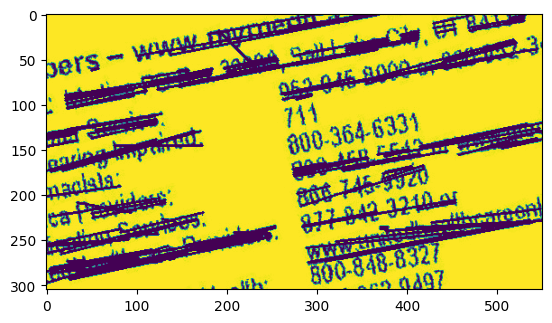

In [5]:
# Mostrar Lineas..
image = cv2.imread("text1.jpg",0)
mostrar_lineas(image)

-10.713123022791034


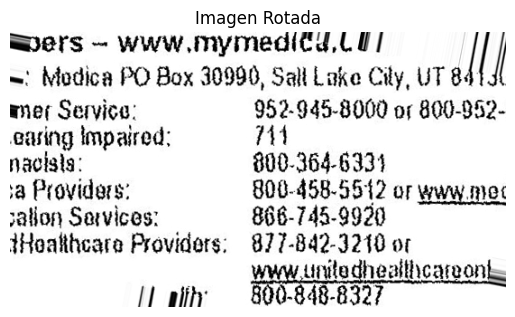

In [8]:
# Funcion Correcta de la funcionalidad
image = cv2.imread("text1.jpg",0)
rotar_imagen_correcta(image)